In [10]:
from mylib.statistic_test import *
from sklearn.decomposition import PCA

code_id = "0868 - DeepLabCut-based Behavioral State Identification"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

pass

        E:\Data\FinalResults\Dsp\0868 - DeepLabCut-based Behavioral State Identification is already existed!


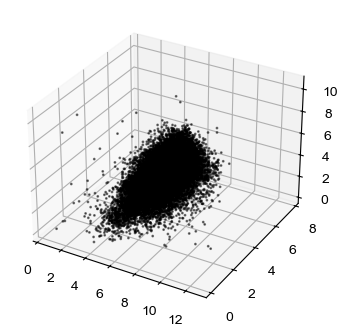

In [15]:
with open(f2['Trace File'][34], 'rb') as f:
    trace = pickle.load(f)

downsampled_idx = np.isin(trace['behav_time_original'], trace['correct_time'])

dlc_data = np.stack([trace['dlc_position'][k][downsampled_idx, :] for k in trace['dlc_position'].keys()], axis=2)

displacement0 = np.sqrt(np.sum((dlc_data[:, :, 0] - dlc_data[:, :, 1])**2, axis=1))
displacement1 = np.sqrt(np.sum((dlc_data[:, :, 1] - dlc_data[:, :, 2])**2, axis=1))
displacement2 = np.sqrt(np.sum((dlc_data[:, :, 2] - dlc_data[:, :, 3])**2, axis=1))

concat_displ = np.vstack([displacement0, displacement1, displacement2]).T
kept_idx = np.where((concat_displ[:, 0] <= 20) & (concat_displ[:, 1] <= 20) & (concat_displ[:, 2] <= 20))[0]

fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='3d')
ax.scatter(concat_displ[kept_idx, 0], concat_displ[kept_idx, 1], concat_displ[kept_idx, 2], s=1, alpha=0.5, c='k')